# It's Sunday, the 12th of September, 2021. 

![Aerial photo of the Autodromo Nazionale Monza](images/autodromo-aerial-photo.jpg)

### We're at the *Autodromo Nazionale Monza* (or "Monza" for short), just north of Milan, Italy for the Formula 1 Italian Grand Prix.

It's already been an eventful weekend: 23-year-old <font color=#0600ef>**Red Bull**</font> prodigy Max Verstappen entered the paddock having taken the lead of the World Driver's Championship (WDC) standings from reigning and 7-time WDC champion and <font color=#00d2be>**Mercedes**</font> lead driver Lewis Hamilton. Verstappen did this in style, winning his home race at the Dutch Grand Prix in Zandvoort, Netherlands a week ago by over 20 seconds - an eternity in a sport usually measured in milliseconds. 

![Max Verstappen on track at the 2021 Dutch Grand Prix just after winning](images/Fans-celebrate-Max-Verstappens-Dutch-GP-win-planetF1.jpg)

Verstappen and Hamilton's championship fight will eventually go right down to the wire, being decided in controversial fashion on the last lap of the last race of this season...

![Verstappen versus Hamilton on the last lap of Abu Dhabi 2021](images/Max-Verstappen-overtakes-Lewis-Hamilton-for-the-2021-F1-championship.jpg.webp)

...but that's a story for another time. We're here to talk about these guys.

![Ricciardo and Norris racing on space hoppers](images/lando-and-daniel.jpg)

Don't get me wrong, Daniel Ricciardo (left, 32) and Lando Norris (right, 21) are both great drivers. Ricciardo has 7 race wins to his name and managed to best a young Verstappen in their first 2 seasons together at Red Bull - Norris is a promising young talent with a stellar career in the junior series. But in the perpetual technological arms race that is modern Formula 1, a driver can only do what their machinery allows them to do. That's bad news for our heroes because their team, <font color=#ff8700>**McLaren**</font>, are no longer at the top of the pile. They may be the second-oldest active team and have the second-best all-time record (both after their eternal rivals <font color=#dc0000>**Ferrari**</font>), but this sport is completely devoid of sentiment and teams nearly as old and successful as McLaren have fallen into ignominy or even dissolved completely after droughts of success.

This season, McLaren's intent is to capitalize on a rare Ferrari off year and usurp their oldest rivals for 3rd place in the World Constructor's Championship (WCC). So far, it isn't going that well. After both Ferrari drivers finished well last week at Zandvoort, McLaren have lost 3rd Place and are trailing by 11.5 points.

In [4]:
# Let's import the libraries we'll be using:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm

import numpy as np
import pandas as pd

import requests

In [5]:
# Next, we'll enable fastf1's data cache - the library and its API calls move quite a bit of data:
ff1.Cache.enable_cache('cache') 

In [6]:
# Now we'll pull down the team (or "Constructor") standings prior to the Monza race:

# I swear this works when the site hosting it is reachable, but if it doesn't when you run this, 
# I've included a copy of the df it returns as "backupStandings.csv"
# Simply comment out the code below and uncomment the last line

def get_constructor_standings():
    url = "https://ergast.com/api/f1/2021/13/constructorStandings.json"
    response = requests.get(url)
    data = response.json()
    drivers_standings = data['MRData']['StandingsTable']['StandingsLists'][0]['ConstructorStandings']  # noqa: E501
    return drivers_standings

constructor_standings = get_constructor_standings()

standings_df = pd.json_normalize(constructor_standings)
standings_df['points'] = standings_df['points'].astype(float)

# standings_df = pd.read_csv('backupStandings.csv')

ConnectionError: HTTPSConnectionPool(host='ergast.com', port=443): Max retries exceeded with url: /api/f1/2021/13/constructorStandings.json (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7ff32a6c5e50>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [7]:
# We'll go ahead and create variables for our mentioned teams' colors
rb_color = ff1.plotting.team_color('Red Bull')
mer_color = ff1.plotting.team_color('Mercedes')
fer_color = ff1.plotting.team_color('Ferrari')
mcl_color = ff1.plotting.team_color('McLaren')

In [8]:
# And we'll plot the WCC standings as they were before the Monza race
plt.style.use('fivethirtyeight')
plt.figure(figsize = (18, 8))
bars = plt.bar(standings_df['Constructor.name'], standings_df['points'], linewidth = 1, color = '#AEAEAE', edgecolor='#C5C5C5')
plt.xlabel('Team')
plt.ylabel('Points')
plt.title('WCC Standings Before Monza 2021')
bars[0].set_color(mer_color)
bars[1].set_color(rb_color)
bars[2].set_color(fer_color)
bars[3].set_color(mcl_color)

NameError: name 'standings_df' is not defined

<Figure size 1800x800 with 0 Axes>

Monza is the 14th of 22 races in the 2021 season, so McLaren aren't quite done for yet, but Ferrari have been the more consistent team in scoring points with both drivers (in F1, that means finishing races inside the top 10 positions). Norris is in the middle of a banner season, but Ricciardo, who is new to the team and car, is having difficulty adjusting. If McLaren are to retake 3rd in the WCC, they'll need to press their advantages whenever they can.

This would be a good time to check in with our drivers. You two have an advantage around here somewhere, right?

In [9]:
# Set new session and pull Monza qualifying session data
year, grand_prix, session = 2021, 'Monza', 'Q'

quali = ff1.get_session(year, grand_prix, session)
quali.load()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
session     WARNING 	Request for URL https://ergast.com/api/f1/2021/14/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "/Users/jddannunzio/opt/anaconda3/lib/python3.9/site-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/Users/jddannunzio/opt/anaconda3/lib/python3.9/site-packages/urllib3/util/connection.py", line 72, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Users/jddannunzio/opt/anaconda3/lib/python3.9/socket.py", line 954, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/

In [10]:
# Get fastest speed trap measurement for each driver during qualifying
top_speeds = quali.laps[['Driver', 'Team', 'SpeedST']].groupby(['Driver']).max().sort_values('SpeedST', ascending=False)

In [11]:
# Give the top_speeds list a good shake and create the list of colors we need to chart it
top_speeds = top_speeds.reset_index()

team_colors = list()
for index, speed in top_speeds.iterlaps():
    color = ff1.plotting.team_color(speed['Team'])
    team_colors.append(color)

Text(0.5, 1.0, 'Monza 2021 Qualifying: Top Speeds')

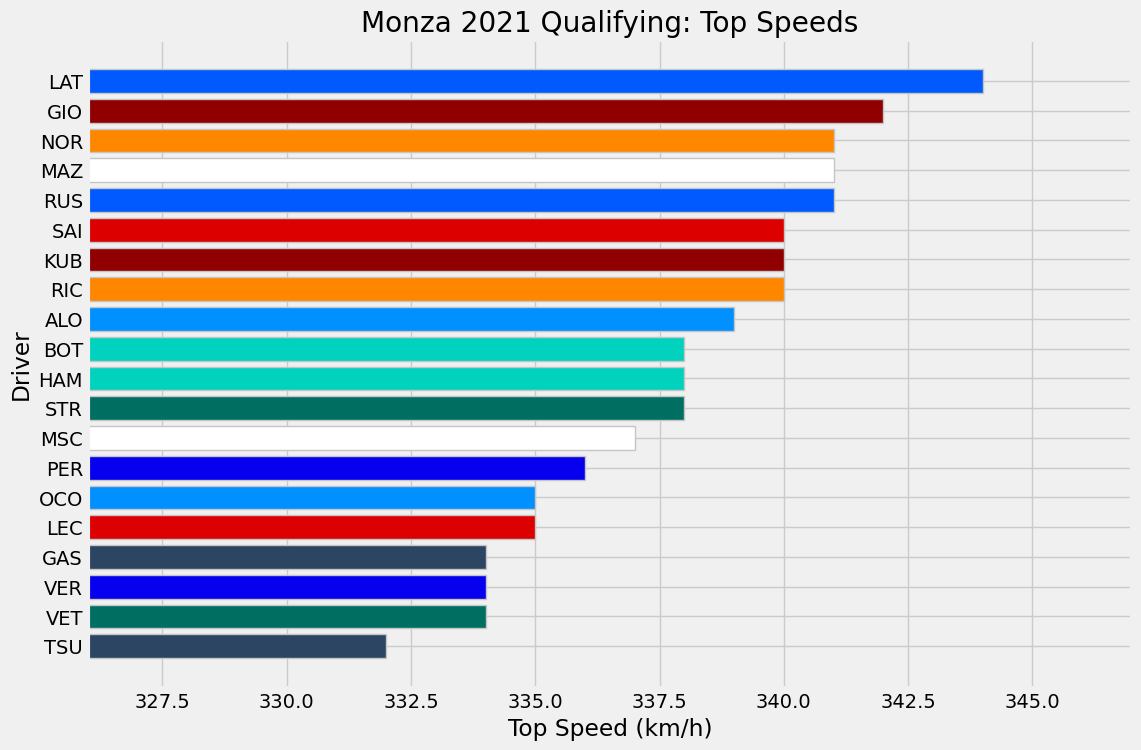

In [12]:
# Create the top speeds chart
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
ax.barh(top_speeds.index, top_speeds['SpeedST'],
        color=team_colors, edgecolor='#C5C5C5', linewidth = 1)
ax.set_yticks(top_speeds.index)
ax.set_yticklabels(top_speeds['Driver'])
ax.invert_yaxis()
ax.set_xlim(326, 347)
ax.set_xlabel('Top Speed (km/h)')
ax.set_ylabel('Driver')
plt.title('Monza 2021 Qualifying: Top Speeds')

Ah, here's something we can work with. 

For the uninitiated: [F1 cars](https://en.wikipedia.org/wiki/Formula_One_car) are by most measures the fastest on the planet, but probably not in the way you're thinking. As you can see above, at Monza they can reach straight-line speeds nearing 350 km/h (around 215 mph), but IndyCars on oval tracks reach up to 380 km/h (around 236 mph). What makes F1 cars so uniquely quick is their [downforce](https://en.wikipedia.org/wiki/Downforce) and the speed it allows them to carry through turns, or "corners". You'll notice that Verstappen, one of the two contenders for the WDC, is shown here with the *3rd-slowest* top speed. But he'll still start the race from pole position because these cars only start to really work when they turn and the inverted wings all over them push them down into the surface of the track, *literally* creating grip out of thin air.

Knowing this, you might expect that Norris (NOR) and Ricciardo (RIC) registering near the top of the speed trap here is a neat bit of trivia to brag about, but not actually helpful for winning races. At other tracks, you might even be right. But Monza is not a normal F1 track. It's the fastest circuit on the calendar, nicknamed "The Temple of Speed", which means it's the kind of place where a car that's decent in the corners and slippery in a straight line can cause some trouble.

Lando and Daniel are *near* the top of this list, though, not *at* the top. If straight line speed is going to be their decisive advantage, they'll need to at least start ahead of the cars with higher top speeds than them.

![Alt text](images/Monza2021Grid.png)

This is, to put it mildly, better than we expected. A strong showing from both drivers in the qualifying sessions and a lucky grid penalty for Mercedes' second driver Valtteri Bottas means the McLaren cars will line up P2 and P3, far and away their best starting positions so far this season.

Nothing left to do now but start the race.

In [ ]:
# Now it's time to import our Monza *race* data from the fastf1 cache:
year, grand_prix, session = 2021, 'Monza', 'R'

race = ff1.get_session(year, grand_prix, session)
race.load()

In [ ]:
# Next, we'll specify the drivers we care about: Ricciardo, Norris, Hamilton, and Verstappen
driver_1, driver_2, driver_3, driver_4 = 'RIC', 'NOR', 'HAM', 'VER'

# Next, we need to convert our drivers' laptimes from the `timedelta` datatype into floats so that we can chart them. 
race.laps['LapTimeSeconds'] = race.laps['LapTime'].dt.total_seconds()

# We'll also trim the in- and out-laps from our dataframe as they skew the overall pace.
laps = race.laps.loc[(race.laps['PitOutTime'].isnull() & race.laps['PitInTime'].isnull())]

In [ ]:
drivers_to_visualize = ['RIC', 'NOR', 'HAM', 'VER']
visualized_teams = []

plt.rcParams['figure.figsize'] = [16, 12]

fig, ax = plt.subplots()

for driver in drivers_to_visualize:
    driver_laps = race.laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Get their team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # The formation lap is counted as "Lap 1" in the data, so we subtract it from the count
    x = driver_laps['LapNumber'] - 1

    # Create a rolling average of laptimes
    # y = driver_laps['LapTimeSeconds'].rolling(3, center=True).mean()
    y = driver_laps['LapTimeSeconds']
    
    # To ensure teammates' lines are distinct
    linestyle = '-' if team not in visualized_teams else ':'
    
    ax.plot(x, y, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth=1.5)
    ax.set(ylabel = 'Laptime (sec)')
    ax.set(xlabel = 'Lap Number')
    ax.set_xlim(1, 22)
    ax.set_ylim(84, 90)
    ax.set_title('Monza 2021 Stint 1 (P1-4)')
    ax.legend()
    
    # Add the team to the visualized teams variable so that the next time the linestyle will be different
    visualized_teams.append(team)

sc_yellow = '#ffca00'
ax.axvspan(24, 30, color=sc_yellow, alpha=0.3)
ax.axvspan(43, 44, color=sc_yellow, alpha=0.3)


Ricciardo and Norris make great starts and wind up P1 and P3, ahead of Verstappen and Hamilton, respectively. As we can see, they're faster than their opponents just as often as slower *on average* around a full lap, but crucially they retain their straight-line top speed advantage. This is a very close pair of races, but in both cases, our McLaren drivers are managing to fend off the WDC leaders in the two fastest cars on the grid. This is going to come down to the pitstops.

![Alt text](images/RBPitStop.jpg)

In each F1 race, each driver is required to stop and change tires at least once. A Formula 1 pit stop is an intricate, choreographed dance between 20 or so mechanics that takes, if all goes to plan, [less than 3 seconds to complete](https://www.youtube.com/watch?v=BI75uWxEajA). It's also the most visible reason that, despite a driver's lonely position in the cockpit, F1 is still a team sport. A great stop can seal a victory in exactly the way that a terrible one can ruin it. And because the pit lane at each track has a speed limit, each stop will cost a driver between 20 and 30 seconds of race time, not including the stop itself. Because of this, teams prefer to stop only once per race - this minimizes both the amount of time their driver must make up on track and the chance of a costly error during the stop. 

All of this is to say that if you're Verstappen, running close behind Ricciardo but not close enough to make the pass, or Hamilton, not quite able to get the move done on Norris, you like your odds of getting ahead during the pit phase. After all, your team is famous for their stops.

![Alt text](images/DHLFastestPit.jpg)

On the other hand, if you're driving an orange car, you're crossing your fingers in between each of the 40 or 50 gear changes you're pulling every lap. McLaren are decidedly *not* famous for their pit work. Nevertheless, you've got to stop sometime, and logistics usually dictate the lead driver comes in first. So on Lap 23, Ricciardo does.

He's stationary for 2.4 seconds and in the pitlane for just under 24 total, an excellent stop by anyone's standards. Verstappen and Red Bull are forced to try and make a strategy called the "overcut" work, hoping they can wring more pace out of their old tires than Daniel can out of his new set, stop on the next lap, and emerge in front. A little over a minute later, Verstappen dives into the pitlane, and...

It's a *disaster*. A problem with one of the wheel guns leaves him stationary for 11 seconds, Red Bull's longest stop of the season by a mile. By the time Verstappen drives back onto the main straight, he's been off the track for well over 30 seconds. From his new position in P10, he's got a *lot* of ground to make up.

![Alt text](images/HAMvNOR.jpg)

Meanwhile, Norris has held off Hamilton as long as he can and the 7-time champion overtakes him on Lap 24. With nothing left to accomplish in his first stint, he pits the next time past the entrance. Somehow, the McLaren pit crew come through *again*, delivering a solid if unremarkable 2.7-second stop and getting him back onto the track ahead of Verstappen. Hamilton, like Verstappen, is forced to pit the lap after and, also like Verstappen, is held long by his pit crew. He's still for 4.2 seconds, meaning when he rejoins the race, he's just behind Norris and wheel-to-wheel with his championship rival Verstappen.

These two have already clashed on track a few times this year, causing millions of dollars in damages and losing both of them dozens of championship points. It's fine, though, I'm sure they've learned their lesson.

![Alt text](images/HAMvVER0.jpg)

![Alt text](images/HAMvVER1.jpg)

![Alt text](images/HAMvVER2.jpg)

I guess it really was too much to ask for.

On the bright side, what's terrible news for the Mercedes and Red Bull teams is music to the ears of the McLaren engineers - their biggest threats for the win are now out of the race entirely. They instruct Norris not to race Ricciardo and hold position in P2, to ensure what happened to their rivals doesn't happen to them. The orange cars keep their competitors out of touching distance behind them for the remaining 27 laps and McLaren notch their first win since 2012 - and first 1-2 finish since 2010.

You could say the team appreciated it.

![Ricciardo crosses the finish line](images/DannyFinish2.jpg)

But let's take a step back. In the weeks to come, discussion of McLaren's success in Monza will be colored by the fact Ricciardo and Norris weren't forced to race Verstappen and Hamilton through the end of the final lap. They wind up finishing ahead of Verstappen and Hamilton's teammates (Sergio Perez and Valtteri Bottas, respectively) and both Ferrari drivers and both drivers set their fastest laps of the race on the 53rd and final lap, less than 0.2 of a second apart, indicating they had pace in reserve. 

If you've made it this far, though, you don't want to take my word for it - you want to see the data.

## Could McLaren Have Won Anyway?

In [ ]:
# Here we'll use the same charting logic as before, expanded to cover all McLaren, Red Bull, Mercedes, and Ferrari drivers:
drivers_to_visualize = ['RIC', 'NOR', 'HAM', 'BOT', 'VER', 'PER', 'LEC', 'SAI']
visualized_teams = []
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [16, 12]
fig, ax = plt.subplots()

for driver in drivers_to_visualize:
    driver_laps = race.laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    driver_laps = driver_laps.dropna()
    team = pd.unique(driver_laps['Team'])[0]
    x = driver_laps['LapNumber'] - 1
    # Because of the jagged nature and dense distribution of these lines, we'll chart a 3-lap rolling average of their pace
    y = driver_laps['LapTimeSeconds'].rolling(3, center=True).mean()
    linestyle = '-' if team not in visualized_teams else ':'
    ax.plot(x, y, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth=1.5)
    ax.set(ylabel = 'Laptime (sec)')
    ax.set(xlabel = 'Lap Number')
    ax.set_xlim(1, 54)
    ax.set_ylim(85, 88.5)
    ax.set_title("Monza 2021 Potential Winners' Pace")
    ax.legend()
    visualized_teams.append(team)

# Highlight Safety Car & Virtual Safety Car laps in F1's Safety Car Yellow (toned down a bit) to highlight unrepresentative laptimes
sc_yellow = '#ffca00'
ax.axvspan(23, 31, color=sc_yellow, alpha=0.4)
ax.axvspan(41, 45, color=sc_yellow, alpha=0.4)

I've taken the liberty of creating a 3-lap rolling average of the featured drivers' laptimes as described above to make this chart a bit more legible, but the overall contour of laptimes decreasing after a tire change and toward the end of the race (as more and more of the 110 kg of fuel burns off and the car becomes lighter) are still clearly visible. The areas that stick out to me here are just after the first <font color=#F7DC77>**Safety Car**</font> period (shown in yellow - F1 uses these to greatly slow down drivers on track while a damaged or disabled car is recovered, hence the collective spikes in laptime) and the final stretch from the end of the second (Virtual) Safety Car period to the end.

On Lap 31, as the race restarts with the field nose-to-tail, Norris immediately overtakes the Ferrari of Charles Leclerc (LEC) for P2 and follows Ricciardo up the road. Perez (PER) and Bottas (BOT) make great time for the first few laps on their fresh tires, but are preoccupied with racing the Ferraris of Leclerc and Sainz (SAI) in their midst and don't close up to the McLarens until Lap 38, at which point they use up the grip in their tires and precious spare fuel scrapping over P3. Though they keep the McLarens in sight, they are unable to break away from one another and therefore unable to mount a serious attempt at an overtake.

On Lap 45, as the race gets going again with gaps between cars intact, the incentive to conserve fuel and tires is all but gone for the drivers we're following. The teams will have planned their strategies around 53 full laps of racing, meaning each slower lap behind the Safety Car gives them fuel and tire life they weren't expecting to have. It's a dash to the line at this point, and we see the McLarens open it up for the first time. They're consistently faster than their opponents and, as I mentioned before, still have enough left in the tank to set the 1st- and 2nd-fastest laps of the race on the final lap.

![Ricciardo and Norris in the #1 and #2 spots in parc ferme](images/Monza2021ParcFerme.jpg)

Finishing P1 and P2 in an F1 qualifying session is referred to as a "front row lockout" and is nearly as sought after as a 1-2 finish - it allows that team to start with both cars in the lead, manage the race, and work together to maintain their position. McLaren effectively created this position for themselves mid-race, which could only help their chances of carrying it across the line. 

My (admittedly biased) opinion is that, given this and their straight-line advantage, a McLaren car would have crossed the finish line first with or without that crash. And it's a lucky thing, too, otherwise we might never have seen team principal Zak Brown engaging in Ricciardo's Australian victory tradition:

![Zak Brown doing a shoey on the Monza 2021 podium](images/Monza2021Podium.jpeg)